In [28]:
import pandas as pd

In [29]:
df1=pd.read_excel('New Inventory.xlsx')

In [30]:
df2=pd.read_excel('Inventory Dataset.xlsx')

#### Changing the column name of dataframe 1 and concatenating the 2 dataframes

In [31]:
df = (pd.concat([df1
                    .rename({'Inventory Receive' : 'Date','Total Item Qty' : 'Inventory'
                            }, axis=1),
                 df2]).sort_values(['Item Number', 'Date']))
df['Inventory'] = df.groupby('Item Number')['Inventory'].cumsum()
df = (df.groupby(['Item Number', 'Date'], as_index=False).last()
        .sort_values('Date'))
df

,Item Number,Date,Inventory
1367,064-18-9962,2023-06-17,19
296,064-09-0467,2023-06-17,69
295,064-09-0466,2023-06-17,133
294,064-09-0465,2023-06-17,103
967,064-13-4042,2023-06-17,2
...,...,...,...
1051,064-18-0170,2023-12-01,18360
1076,064-18-0309,2023-12-08,20500
1230,064-18-4752,2023-12-08,20500
1357,064-18-9904,2023-12-15,23800


##### Changing and grouping by week and suming the inventory values accoriding to the week

In [32]:
df['Date'] = pd.to_datetime(df['Date']) - pd.to_timedelta(7, unit='d')
df = df.groupby(['Item Number', pd.Grouper(key='Date', freq='W-MON')])['Inventory'].sum().reset_index().sort_values('Date')
print (df)

      Item Number       Date  Inventory
1226  064-18-9962 2023-06-12         19
356   064-09-3787 2023-06-12      27104
912   064-18-0081 2023-06-12        716
916   064-18-0096 2023-06-12         12
917   064-18-0123 2023-06-12          4
...           ...        ...        ...
921   064-18-0170 2023-11-27      18360
945   064-18-0309 2023-12-04      20500
1093  064-18-4752 2023-12-04      20500
1216  064-18-9904 2023-12-11      23800
922   064-18-0170 2023-12-11      23220

[1227 rows x 3 columns]


##### Changing the index value to item number

In [33]:
df.set_index("Item Number", inplace=True)
df

,Date,Inventory
Item Number,,
064-18-9962,2023-06-12,19
064-09-3787,2023-06-12,27104
064-18-0081,2023-06-12,716
064-18-0096,2023-06-12,12
064-18-0123,2023-06-12,4
...,...,...
064-18-0170,2023-11-27,18360
064-18-0309,2023-12-04,20500
064-18-4752,2023-12-04,20500


In [45]:
df3=df.reset_index().groupby(['Item Number', 'Date'])['Inventory'].first().unstack()
df3

Date,2023-06-12,2023-07-03,2023-07-10,2023-07-17,2023-07-24,2023-07-31,2023-08-14,2023-08-21,2023-09-04,2023-09-11,2023-09-18,2023-09-25,2023-10-02,2023-10-09,2023-10-16,2023-11-20,2023-11-27,2023-12-04,2023-12-11
Item Number,,,,,,,,,,,,,,,,,,,
064-01-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5488.0,NaN,7352.0,NaN,NaN,NaN,NaN,NaN
064-01-0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7380.0,NaN,9900.0,NaN,NaN,NaN,NaN,NaN
064-01-0006,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-01-0012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6840.0,NaN,10084.0,NaN,NaN,NaN,NaN,NaN
064-01-0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6300.0,NaN,8048.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-18-9904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18700.0,NaN,23800.0
064-18-9909,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df3

Item Number  Date      
064-01-0003  2023-09-25     5488
             2023-10-09     7352
064-01-0005  2023-09-25     7380
             2023-10-09     9900
064-01-0006  2023-06-12       10
                           ...  
064-18-9938  2023-08-14    12148
             2023-09-04    14232
             2023-09-25    16208
             2023-10-09    18184
064-18-9962  2023-06-12       19
Name: Inventory, Length: 1227, dtype: int64

#### Filling the null values using interp

In [46]:
df3 = df3.interpolate(method='linear')

In [47]:
df3

Date,2023-06-12,2023-07-03,2023-07-10,2023-07-17,2023-07-24,2023-07-31,2023-08-14,2023-08-21,2023-09-04,2023-09-11,2023-09-18,2023-09-25,2023-10-02,2023-10-09,2023-10-16,2023-11-20,2023-11-27,2023-12-04,2023-12-11
Item Number,,,,,,,,,,,,,,,,,,,
064-01-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5488.0,NaN,7352.0,NaN,NaN,NaN,NaN,NaN
064-01-0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7380.0,NaN,9900.0,NaN,NaN,NaN,NaN,NaN
064-01-0006,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7110.0,NaN,9992.0,NaN,NaN,NaN,NaN,NaN
064-01-0012,277.636364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6840.0,NaN,10084.0,NaN,NaN,NaN,NaN,NaN
064-01-0013,545.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6300.0,NaN,8048.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.000000,15482.8,23500.0,14799.0,13809.8,14978.6,17825.8,31971.0,20338.600000,19968.0,11232.0,17556.2,13616.0,18466.6,17512.0,12424.0,18696.530612,20500.0,23794.081633
064-18-9904,6215.500000,12155.2,23500.0,14799.0,12105.2,13340.4,15933.2,31971.0,18303.066667,19968.0,11232.0,17106.8,13616.0,18372.4,17512.0,12424.0,18700.000000,20500.0,23800.000000
064-18-9909,12.000000,8827.6,23500.0,14799.0,10400.6,11702.2,14040.6,31971.0,16267.533333,19968.0,11232.0,16657.4,13616.0,18278.2,17512.0,12424.0,18700.000000,20500.0,23800.000000


In [48]:
df3.dropna()

Date,2023-06-12,2023-07-03,2023-07-10,2023-07-17,2023-07-24,2023-07-31,2023-08-14,2023-08-21,2023-09-04,2023-09-11,2023-09-18,2023-09-25,2023-10-02,2023-10-09,2023-10-16,2023-11-20,2023-11-27,2023-12-04,2023-12-11
Item Number,,,,,,,,,,,,,,,,,,,
064-18-3496,1346.0,7363.4,23500.0,23869.470588,18360.428571,18780.6,20812.0,24112.344828,12422.571429,30752.000000,10944.0,13253.0,13616.0,14943.0,17512.0,12424.0,18495.306122,20500.0,23450.816327
064-18-3517,1.0,9555.8,23500.0,24665.117647,18127.571429,18580.7,20648.8,24058.620690,14456.857143,29553.777778,10980.0,15012.5,13616.0,16857.5,17512.0,12424.0,18498.775510,20500.0,23456.734694
064-18-3518,3.0,11748.2,23500.0,25460.764706,17894.714286,18380.8,20485.6,24004.896552,16491.142857,28355.555556,11016.0,16772.0,13616.0,18772.0,17512.0,12424.0,18502.244898,20500.0,23462.653061
064-18-3662,4.0,13940.6,23500.0,26256.411765,17661.857143,18180.9,20322.4,23951.172414,18525.428571,27157.333333,11052.0,18531.5,13616.0,20686.5,17512.0,12424.0,18505.714286,20500.0,23468.571429
064-18-3665,12359.0,16133.0,23500.0,27052.058824,17429.000000,17981.0,20159.2,23897.448276,20559.714286,25959.111111,11088.0,20291.0,13616.0,22601.0,17512.0,12424.0,18509.183673,20500.0,23474.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.0,15482.8,23500.0,14799.000000,13809.800000,14978.6,17825.8,31971.000000,20338.600000,19968.000000,11232.0,17556.2,13616.0,18466.6,17512.0,12424.0,18696.530612,20500.0,23794.081633
064-18-9904,6215.5,12155.2,23500.0,14799.000000,12105.200000,13340.4,15933.2,31971.000000,18303.066667,19968.000000,11232.0,17106.8,13616.0,18372.4,17512.0,12424.0,18700.000000,20500.0,23800.000000
064-18-9909,12.0,8827.6,23500.0,14799.000000,10400.600000,11702.2,14040.6,31971.000000,16267.533333,19968.000000,11232.0,16657.4,13616.0,18278.2,17512.0,12424.0,18700.000000,20500.0,23800.000000


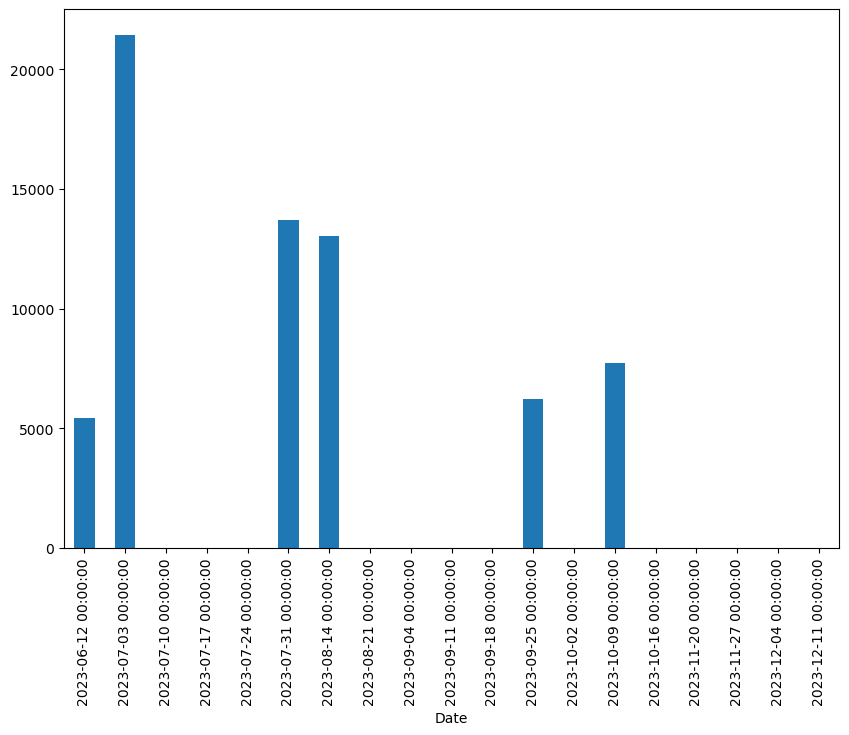

In [55]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(10, 7))
df4=df3.iloc[50]
df4.plot(kind="bar") 
 
# Show Plot
plt.show()